In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc
    
GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nlh/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [6]:
## NLH

# Options ################################
L1 = '150'
L2 = '175'
L3 = '252'
L4 = '272'
H  = 'b5v01c2'
##########################################
##########################################
titleL = L2
titleH = H
titleL30 = 'v01L13'
titleL80 = 'v13L28'
thresh = 1.00e-06
##########################################
##########################################

labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
labs_mod = ['002']+labs[1:]
H_list = ['ph{}_c'.format(titleH)+i+'.dat' for i in labs_mod]
L_list = ['ph{}_c'.format(titleL)+i+'.dat' for i in labs_mod]
L30_list = ['ph{}_c'.format(titleL30)+i+'.dat' for i in labs_mod]
L80_list = ['ph{}_c'.format(titleL80)+i+'.dat' for i in labs_mod]
H_list = [GIT+i for i in H_list]
L_list = [GIT+i for i in L_list]
L30_list = [GIT+i for i in L30_list]
L80_list = [GIT+i for i in L80_list]
algs = ['thresh', 'maxpt', 'norm']

Hs = pd.DataFrame([np.zeros(len(H_list))]*5, index=['cs', 'kapd']+algs).transpose()
Hs.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Hs.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Hs.cs]
for algind in range(3):
    for i in range(len(H_list)): 
      Hs.iloc[i, algind+2] = tjy.H_find(H_list[i], alg=algs[algind], thresh=thresh)
print(Hs)
Ls = pd.DataFrame([np.zeros(len(L_list))]*5, index=['cs', 'kapd']+algs).transpose()
Ls.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Ls.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Ls.cs]
for algind in range(3):
    for i in range(len(L_list)): 
      Ls.iloc[i, algind+2] = tjy.H_find(L_list[i], alg=algs[algind], thresh=thresh)
print(Ls)
# L30 = pd.DataFrame([np.zeros(len(L30_list))]*5, index=['cs', 'kapd']+algs).transpose()
# L30.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
# L30.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in L30.cs]
# for algind in range(3):
#     for i in range(len(L30_list)): 
#       L30.iloc[i, algind+2] = tjy.H_find(L30_list[i], alg=algs[algind], thresh=thresh)
# print(L30)
L80 = pd.DataFrame([np.zeros(len(L80_list))]*5, index=['cs', 'kapd']+algs).transpose()
L80.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
L80.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in L80.cs]
for algind in range(3):
    for i in range(len(L80_list)): 
      L80.iloc[i, algind+2] = tjy.H_find(L80_list[i], alg=algs[algind], thresh=thresh)
print(L80)

      cs      kapd    thresh     maxpt      norm
0    1.5  7.871251  7.876015  2.300176  3.429217
1    3.0  5.565815  7.880116  2.307336  3.447097
2    5.0  4.311262  7.849074  2.310006  3.454767
3    7.0  3.643681  7.812484  2.312278  3.460430
4   10.0  3.048522  7.761511  2.309973  3.457609
5   20.0  2.155631  7.630344  2.303968  3.448551
6   50.0  1.363341  7.441628  2.286974  3.418031
7  150.0  0.787125  7.268756  2.267062  3.379665
      cs      kapd     thresh     maxpt       norm
0    1.5  7.871251  37.096581  7.298164  12.942323
1    3.0  5.565815  34.870991  7.023731  12.132099
2    5.0  4.311262  32.970765  6.732677  11.312573
3    7.0  3.643681  31.661141  6.510330  10.695311
4   10.0  3.048522  30.275643  6.263101  10.012473
5   20.0  2.155631  27.766470  5.811586   8.769759
6   50.0  1.363341  25.156147  5.399612   7.652451
7  150.0  0.787125  23.318880  5.170932   7.083575
      cs      kapd     thresh     maxpt      norm
0    1.5  7.871251   0.000000       NaN       NaN


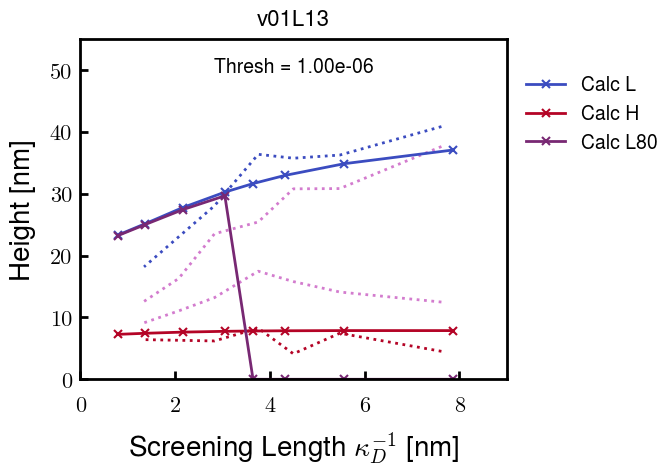

In [7]:
#EAD 20220705 Data
EADcs = [1.6, 3.1, 4.6, 6.6, 11.6, 51.6]
EADcs2 = [1.6, 3.1, 4.6, 6.6, 11.6, 21.6, 51.6]
EADcs3 = [1.6, 4.6, 11.6, 51.6]

EADdeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs]
EADdeb2 = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs2]
EADdeb3 = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs3]

EADL_1 = [37.3503292, 35.66635517, 31.60367327, 30.51213493, 19.55555023, 17.70957033]
EADL_2 = [40.65413833, 36.88049873, 39.54620197, 42.27351153, 25.3742907, 15.54885597]
EADL_3, EADL_3n = [42.18774154, 34.42681131, 36.94680269, 21.60936372], [42.18774154, np.nan, 34.42681131, np.nan, 36.94680269, 21.60936372]
EADL_4, EADL_4n = [43.32828107, 37.47239234, 30.41876754, 17.88987109], [43.32828107, np.nan, 37.47239234, np.nan, 30.41876754, 17.88987109]
EADL_a = np.nanmean(np.array([EADL_1, EADL_2, EADL_3n, EADL_4n]), axis=0)

EADH_1 = [3.982809973, 6.14174949, 4.122060533, 8.4279967, 7.393286337, 5.624564563]
EADH_2 = [5.065632817, 8.7720967, 4.13424014, 8.122542053, 5.0094431, 7.20754611]
EADH_3 = [4.300001733, 3.849165782, 4.263458652, 3.577032201]
EADH_a = np.mean(np.array([EADH_1, EADH_2]), axis=0)

EAD80_1 = [39.0904899, 31.6319996, 31.4951879, 22.2966476, 22.8323448, 15.1019332, 11.9286194]
EAD80_2 = [36.2127833, 30.0737538, 30.1231263, 28.5908979, 24.2522966, 17.5124717, 13.271754]
EAD80_a = np.mean(np.array([EAD80_1, EAD80_2]), axis=0)
EAD30_1 = [8.40892663, 13.392325, 15.4668739, 18.8685071, 12.7833741, 10.7519308, 8.06502549]
EAD30_2 = [16.5840688, 14.8418816, 16.1486509, 16.0967578, 13.6481441, 11.375515, 10.2151375]
EAD30_a = np.mean(np.array([EAD30_1, EAD30_2]), axis=0)

## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)
for i in [0]:
    # plt.plot(EADdeb, EADL_1, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="Pure L")
    # plt.plot(EADdeb, EADL_2, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    # plt.plot(EADdeb3, EADL_3, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    # plt.plot(EADdeb3, EADL_4, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    plt.plot(EADdeb, EADL_a, ':', color=tjy.lighten_color(cool_blue,1.0), label="_Pure L")
    # plt.plot(EADdeb, EADH_1, 'o', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="Pure H")
    # plt.plot(EADdeb, EADH_2, 'o', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="_Pure H")
    plt.plot(EADdeb, EADH_a, ':', color=tjy.lighten_color(warm_red,1.0), label="_Pure H")
    # plt.plot(EADdeb2, EAD80_1, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="80% L")
    # plt.plot(EADdeb2, EAD80_2, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_80% L")
    plt.plot(EADdeb2, EAD80_a, ':', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_80% L")
    # plt.plot(EADdeb2, EAD30_1, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="30% L")
    # plt.plot(EADdeb2, EAD30_2, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_30% L")
    plt.plot(EADdeb2, EAD30_a, ':', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_30% L")
    plt.xlim(0, 9)
    plt.ylim(0, 55)
    plt.title(r"")
    plt.ylabel('Height' ' [nm]')
    plt.xlabel(r'Screening Length $\kappa_D^{-1}$'+' [nm]')
    plt.xticks([0, 2, 4, 6, 8])

## Data Plotting 
text_loc = (0.50, 0.92)
text_kw = {'fontsize':  14,
           'ha':        'center',
           'va':        'center', 
           'bbox':      dict(boxstyle='square', facecolor='none', edgecolor='none')}
L_kw = {'color': cool_blue, 'marker': 'x'}
Lx_kw = {'color': mix_purp, 'marker': 'x'}
H_kw = {'color': warm_red,  'marker': 'x'}
# norm
# plt.sca(axs[0])
# plt.text(*text_loc,'Norm'.format(thresh), transform=plt.gca().transAxes, **text_kw)
# plt.plot(Ls.kapd, Ls.norm, label= 'Calc L', **L_kw)
# thresh
# plt.sca(axs[1])
plt.text(*text_loc,'Thresh = {:.2e}'.format(thresh), transform=plt.gca().transAxes, **text_kw)
plt.plot(Ls.kapd, Ls.thresh, label= 'Calc L', **L_kw)
plt.plot(Hs.kapd, Hs.thresh, label= 'Calc H', **H_kw)
# plt.plot(L30.kapd, L30.thresh, label= 'Calc L30', **Lx_kw)
plt.plot(L80.kapd, L80.thresh, label= 'Calc L80', **Lx_kw)

leg = axs.legend(bbox_to_anchor=(1.00,0.95), loc='upper left', fontsize=14, borderpad=0)
# axs.set_title(titleH +' & '+ titleL,fontsize=16)
axs.set_title(titleL30,fontsize=16)
tjy.ticks()
plt.show()

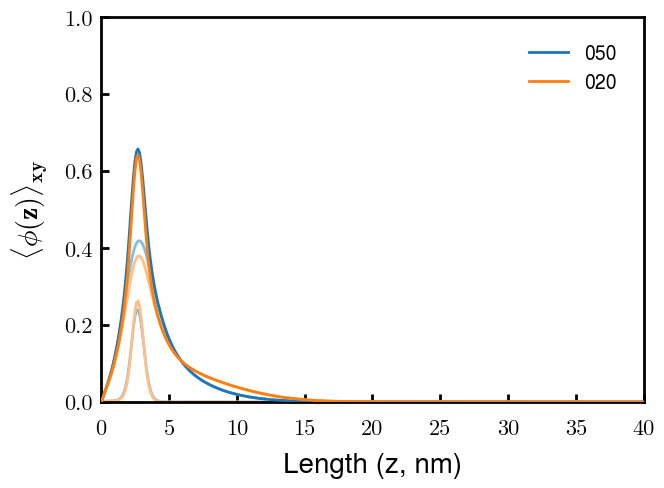

In [14]:
# labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
# labs_mod = ['002']+labs[1:]
labs_mod = ['050', '020']
labs = labs_mod
read_list = [GIT+"phv13L28_c"+i+".dat" for i in labs_mod]
block_Ni = [[4,7]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, x1_end=40, block_Ni=block_Ni, labs=labs, double=False)

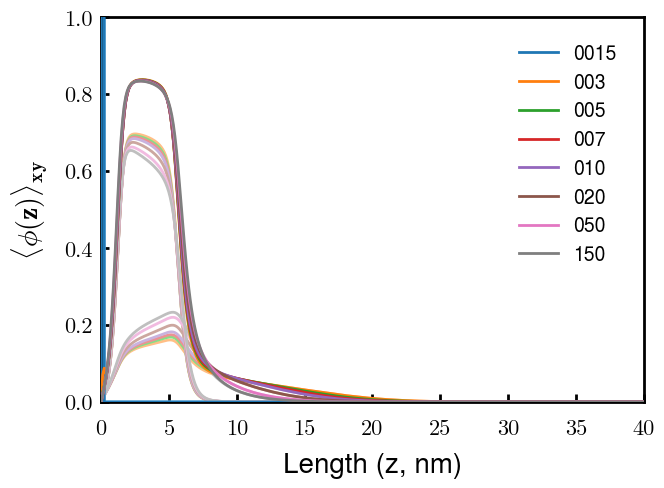

In [35]:
labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
labs_mod = ['002']+labs[1:]
read_list = [GIT+"phmix80_c"+i+".dat" for i in labs_mod]
block_Ni = [[4, 7]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, b0=1.00, x1_end=40, block_Ni=block_Ni, labs=labs, double=False)